# 7 vs 8 - New Mask 2

In [12]:
%pylab inline
import matplotlib.pyplot as pl
import unet
from scipy.signal import medfilt

plt.rcParams["figure.figsize"] = (15, 8)

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Load the last satus of the network
summary = unet.summary.load_h5("/cvlabdata2/home/mas/UNet-3D-Test0/summary_300000.h5")

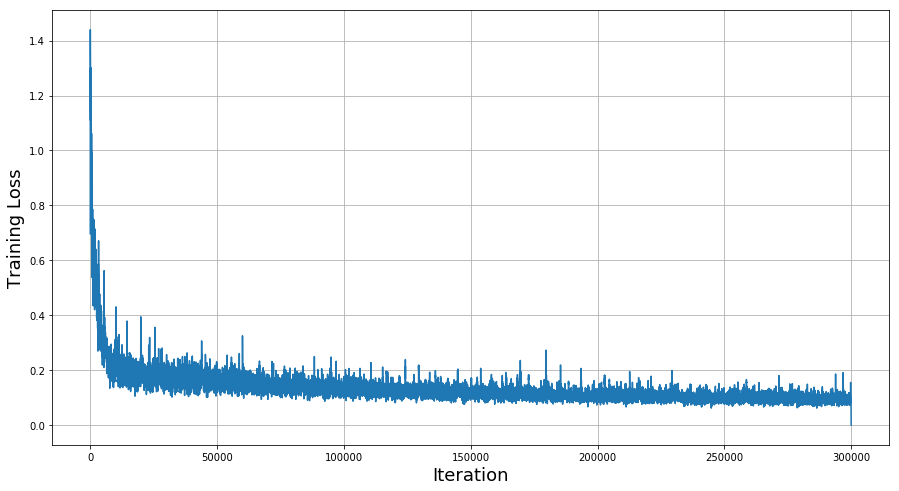

In [14]:
# Printing the training loss
iters, losses = summary.get("training.loss")
plt.plot(iters,medfilt(losses, 51))
plt.grid()
plt.ylabel("Training Loss", fontsize=18)
plt.xlabel("Iteration", fontsize=18)

### Es normal que el 'training.loss' no converja en cero, debido al hecho de que tenemos mucho más datos y es mucho más comlicado que los entienda a la perfección.

200000


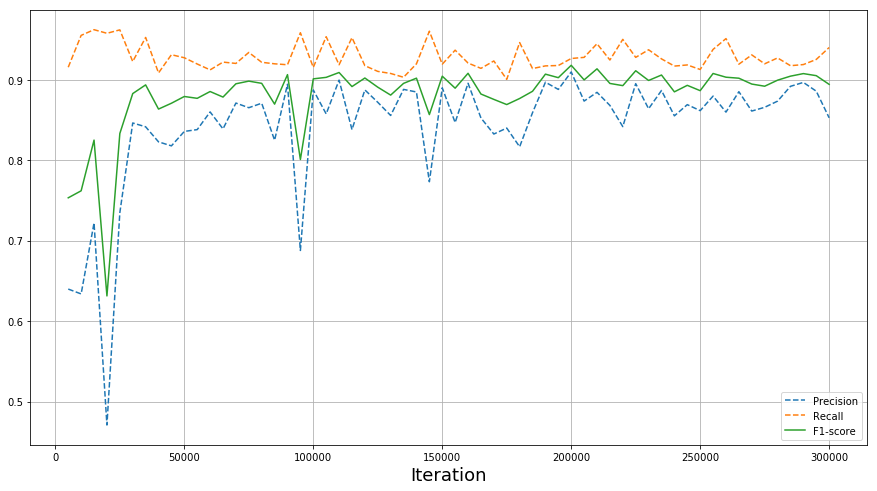

In [15]:
# Printing presicion, recall and f1-score
iters, precision = summary.get("testing.total_precision")
recall = summary.get("testing.total_recall")[1]

f1_score = 2 * precision * recall / (precision + recall)
plt.plot(iters, precision, '--', label='Precision')
plt.plot(iters, recall, '--', label='Recall')
plt.plot(iters, f1_score, label='F1-score')
plt.legend(loc="lower right")
print(iters[f1_score.argmax()]) # Iteration with the best f1-score
plt.grid()

plt.xlabel("Iteration", fontsize=18)

In [16]:
print(precision.max())
print(recall.max())
print(f1_score.max())

0.909763998149
0.962299717248
0.918048097128


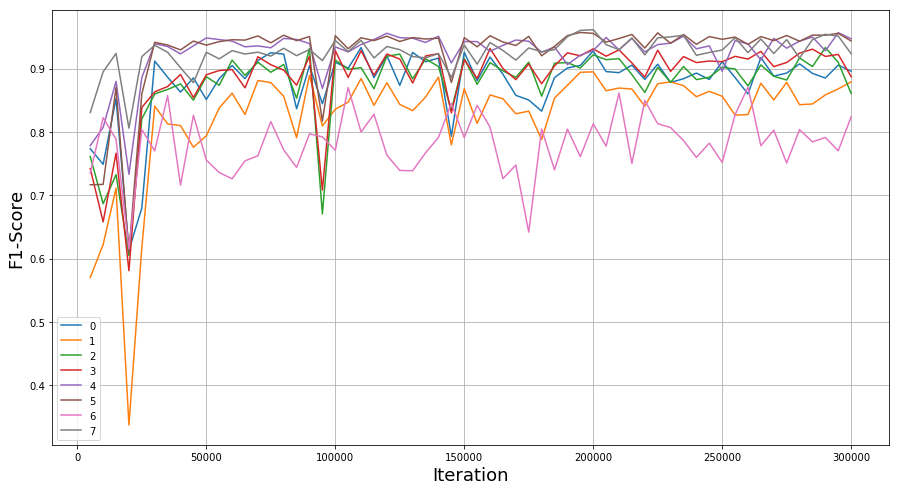

In [17]:
# Printing f1-score of each stack in testing
iters, precisions = summary.get("testing.precisions")
recalls = summary.get("testing.recalls")[1]
f1_scores = 2 * precisions * recalls / (precisions + recalls)
for i in range(8):
    plt.plot(iters, f1_scores[:, i], label=i)
plt.grid()
plt.legend(loc="lower left")
plt.ylabel("F1-Score", fontsize=18)
plt.xlabel("Iteration", fontsize=18)

100000


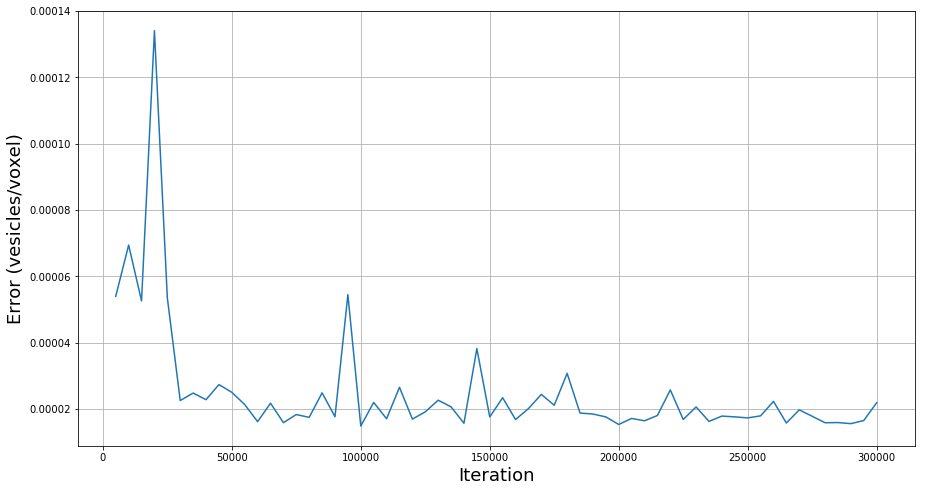

In [18]:
# Printing the error during the training
iters, error = summary.get("testing.total_error")
plot(iters, error)
plt.grid()
print(iters[error.argmin()]) # Iteration with the smallest error
plt.ylabel("Error (vesicles/voxel)", fontsize=18)
plt.xlabel("Iteration", fontsize=18)

In [19]:
print(error.min())

1.48836274771e-05


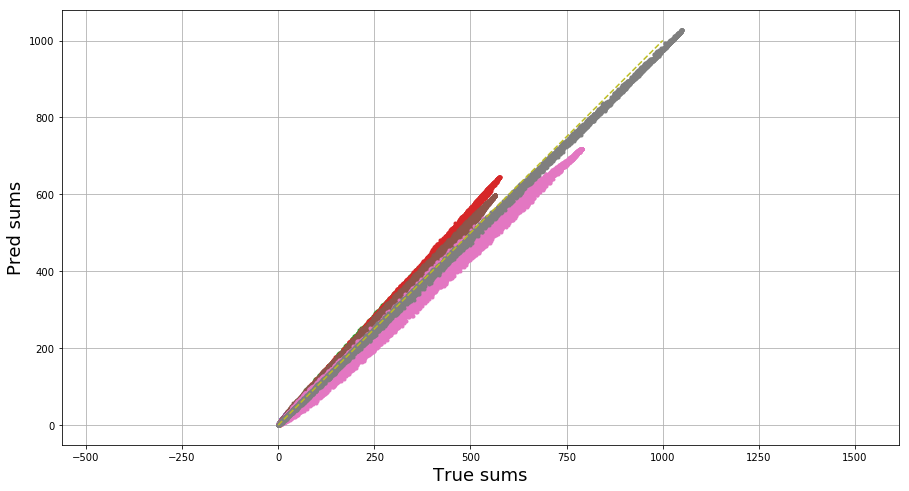

In [20]:
# Graphic relation between the number of vesicles in the prediction and in the data.
iters, true_sums = summary.get("testing.true_sums")
pred_sums = summary.get("testing.pred_sums")[1]
# volumes = summary.get("testing.volumes")[1]

best_it = (iters == 200000).argmax()

plt.plot(true_sums[best_it].T, pred_sums[best_it].T, '.')
plt.plot([0, 1000], [0, 1000], '--')
plt.grid()
plt.axis('equal')
plt.ylabel("Pred sums", fontsize=18)
plt.xlabel("True sums", fontsize=18)